In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Chebyshev:
    """
    Chebyshev(a, b, n, func)
    Given a function func, lower and upper limits of the interval [a,b],
    and maximum degree n, this class computes a Chebyshev approximation
    of the function.
    Method eval(x) yields the approximated function value.
    """
    def __init__(self, a, b, n, func):
        n = n + 1 
        self.a = a
        self.b = b
        self.func = func
        
        bma = 0.5 * (b - a)
        bpa = 0.5 * (b + a)
        f = [func(math.cos(math.pi * (k + 0.5) / n) * bma + bpa) for k in range(n)]
        self.roots = f
        
        self.x = [math.cos(math.pi * (k + 0.5) / n) * bma + bpa for k in range(n)]

        fac = 2.0 / n
        self.c = [fac * sum([f[k] * math.cos(math.pi * j * (k + 0.5) / n)
                  for k in range(n)]) for j in range(n)]

    def eval(self, x):
        a,b = self.a, self.b
        #assert(a <= x <= b)
        y = (2.0 * x - a - b) * (1.0 / (b - a))
        y2 = 2.0 * y
        (d, dd) = (self.c[-1], 0)             # Special case first step for efficiency
        for cj in self.c[-2:0:-1]:            # Clenshaw's recurrence
            (d, dd) = (y2 * d - dd + cj, d)
        return y * d - dd + 0.5 * self.c[0]   # Last step is different

In [8]:
a = -6
b = 6

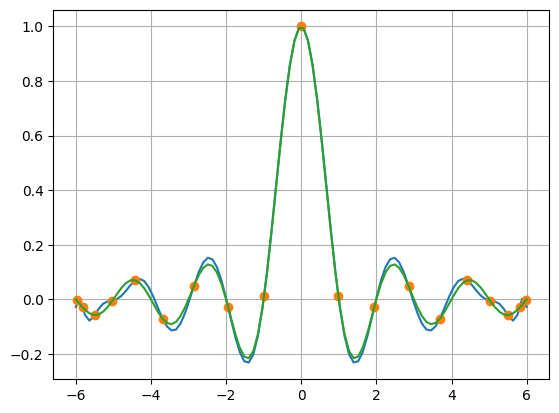

In [21]:
fun = np.sinc
c = Chebyshev(a, b, 18, fun)

x = np.linspace(a, b, 100)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

## $\ell_1$ norm

In [14]:
l1norms = []

for d in range(15,51):
    fun = np.sinc
    c = Chebyshev(-5, 5, d, fun)

    x = np.linspace(-5, 5, 1000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    l1norms.append(np.linalg.norm(y - y_correct, ord=1))

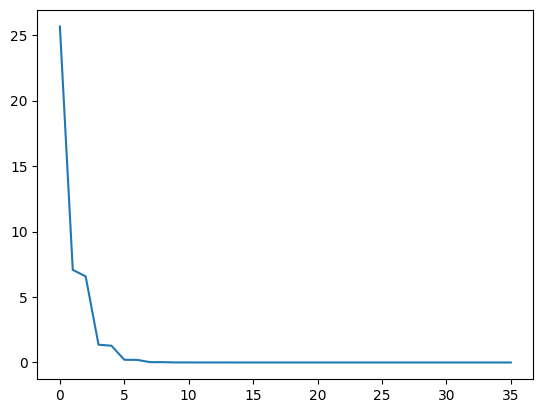

In [15]:
plt.plot(l1norms)

In [16]:
for i in range(len(l1norms)):
    print("(" +str(i+15) +", " + str(l1norms[i]) + ")" )

(15, 25.654205339716743)
(16, 7.071775977356323)
(17, 6.573718642961859)
(18, 1.3567436895407905)
(19, 1.2813392473712293)
(20, 0.2065461509821272)
(21, 0.19717672770618705)
(22, 0.02560792587530565)
(23, 0.024640514356036293)
(24, 0.0026410306097819176)
(25, 0.002557311458825472)
(26, 0.0002306457211136695)
(27, 0.00022430306167734853)
(28, 1.728758570397652e-05)
(29, 1.686674188201879e-05)
(30, 1.1243480947088537e-06)
(31, 1.0999961632359048e-06)
(32, 6.412473216987362e-08)
(33, 6.290288259262909e-08)
(34, 3.2380696641366573e-09)
(35, 3.1787608679811746e-09)
(36, 1.4533526936330007e-10)
(37, 1.4317771224422434e-10)
(38, 5.8656110118518174e-12)
(39, 5.9363625761812695e-12)
(40, 7.837130916258102e-13)
(41, 5.420540953790236e-13)
(42, 5.446668057742792e-13)
(43, 6.693472180835665e-13)
(44, 5.66847838199408e-13)
(45, 6.181314683197103e-13)
(46, 6.48445761062405e-13)
(47, 9.527881320523242e-13)
(48, 6.552098815761076e-13)
(49, 7.478352247354547e-13)
(50, 5.55833103068476e-13)


### $\ell_\infty$ norm

In [17]:
linfnorms = []

for d in range(15,51):
    fun = np.sinc
    c = Chebyshev(-5, 5, d, fun)

    x = np.linspace(-5, 5, 1000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    linfnorms.append(np.linalg.norm(y - y_correct, ord=np.inf))

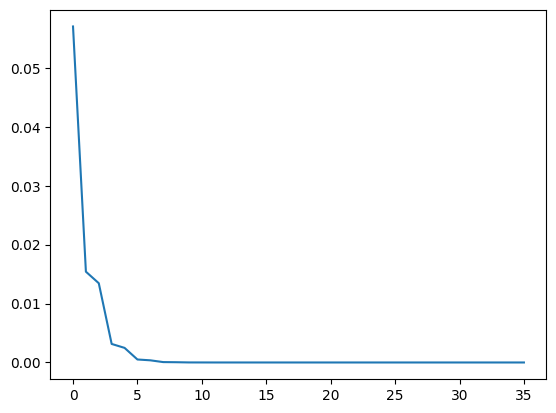

In [18]:
plt.plot(linfnorms)

In [19]:
for i in range(len(linfnorms)):
    print("(" +str(i+15) +", " + str(linfnorms[i]) + ")" )

(15, 0.05703963346224694)
(16, 0.015413733514420241)
(17, 0.013452354422758384)
(18, 0.00314679112894217)
(19, 0.0024789977120356355)
(20, 0.0005065895612735181)
(21, 0.00036668961035868364)
(22, 6.546517086251658e-05)
(23, 4.452154812628617e-05)
(24, 6.9687853717524825e-06)
(25, 4.519826413140748e-06)
(26, 6.233810149859482e-07)
(27, 3.8962708381884426e-07)
(28, 4.761084095293676e-08)
(29, 2.8893235803906236e-08)
(30, 3.1453578742808414e-09)
(31, 1.8636908682978515e-09)
(32, 1.8170878955768807e-10)
(33, 1.0556577834108793e-10)
(34, 9.265557889393454e-12)
(35, 5.2946536044373715e-12)
(36, 4.208743224926873e-13)
(37, 2.369215934550084e-13)
(38, 1.7694179454963432e-14)
(39, 1.0769163338864018e-14)
(40, 2.9976021664879227e-15)
(41, 1.654926196081874e-15)
(42, 2.1371793224034263e-15)
(43, 1.9984014443252818e-15)
(44, 2.0261570199409107e-15)
(45, 2.0539125955565396e-15)
(46, 2.55351295663786e-15)
(47, 2.6645352591003757e-15)
(48, 2.5968810435372802e-15)
(49, 2.706168622523819e-15)
(50, 1.92

Very easy to approximate!